<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_wine_0816_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('winequality-red.csv')

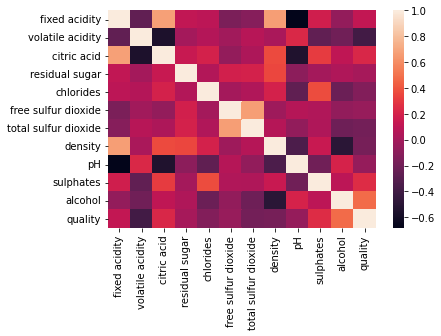

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = red_wine.corr()
sns.heatmap(corr, xticklabels = corr.columns.values,
           yticklabels=corr.columns.values)

In [ ]:
red_wine['quality'].hist()

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from tensorflow.keras.utils import to_categorical

In [6]:
from sklearn.model_selection import train_test_split

X = red_wine.iloc[:,0:11]
y = red_wine['quality']

le = LabelEncoder()
y = le.fit_transform(y)
  

X_train, X_test, y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.33,
                                                  random_state = 42)

y_train_cat = to_categorical(y_train,6)
y_test_cat = to_categorical(y_test, 6)

In [ ]:
# Scale to [0, 1]
# max_ = df_train.max(axis=0)
# min_ = df_train.min(axis=0)
# df_train = (df_train - min_) / (max_ - min_)
# df_valid = (df_valid - min_) / (max_ - min_)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)

In [ ]:
red_wine.describe()

In [10]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[11]),
    # layers.Dropout(rate=0.5),
    # layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(rate=0.5),
    layers.Dense(32, activation='relu'),
    # layers.BatchNormalization(),
    # layers.Dropout(rate=0.5),
    layers.Dense(6, activation='softmax'),
])

In [ ]:
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', metrics=['accuracy']
)

In [12]:
history = model.fit(
    X_train, y_train_cat,
    validation_data = (X_test,y_test_cat),
    batch_size=128,
    # callbacks=[early_stopping],
    epochs=100,
)

Epoch 1/100
9/9 [==============================] - 2s 28ms/step - loss: 1.6672 - accuracy: 0.4332 - val_loss: 1.5472 - val_accuracy: 0.4299
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 1.4207 - accuracy: 0.4342 - val_loss: 1.3080 - val_accuracy: 0.4110
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 1.2222 - accuracy: 0.4332 - val_loss: 1.2044 - val_accuracy: 0.4337
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1650 - accuracy: 0.5107 - val_loss: 1.1725 - val_accuracy: 0.5189
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 1.1299 - accuracy: 0.5658 - val_loss: 1.1321 - val_accuracy: 0.5473
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0912 - accuracy: 0.5378 - val_loss: 1.1077 - val_accuracy: 0.5246
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0649 - accuracy: 0.5378 - val_loss: 1.0870 - val_accuracy: 0.5341
Epoch 8/100
9/9 [=========

# 2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [ ]:
model.summary()

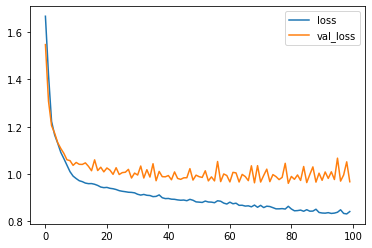

In [13]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[0:100,['loss','val_loss']].plot()

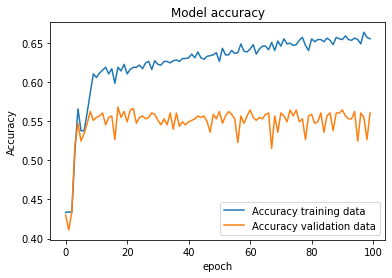

In [14]:
plt.plot(history.history['accuracy'], label='Accuracy training data')
plt.plot(history.history['val_accuracy'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
# mse_value, mae_value = model.evaluate(X_test, y_test, verbose=0)

# print(mse_value)

In [15]:
y_pred = model.predict(X_test)

17/17 [==============================] - 0s 4ms/step


In [16]:
y_pred[0]

array([0.00233455, 0.01443571, 0.5006382 , 0.46040484, 0.02156614,
       0.0006205 ], dtype=float32)

In [ ]:
y_test

In [ ]:
# preds = model.evaluate(x = X_test, y = y_test)
# print()
# print ("Loss = " + str(preds[0]))
# print ("Test Accuracy = " + str(preds[1]))

In [ ]:
# from sklearn.metrics import r2_score

# r2_score(y_test, y_pred)

https://www.tensorflow.org/datasets/catalog/wine_quality

Creating new features¶

Creating new features from existing features is also an important step to check if it improves the accuracy or even correlation with our dependent variable. After little research, I came up with the following new features:

total_acidity - Sum of fixed and volatile acidity. [fixed acidity + volatile acidity]
total_acidity_citric - I learnt that citric acid is a type of titratable or total acid, so i thought maybe i should add that too in total acidity?. Or else let's just create a new feature for that! [fixed acidity + volatile acidity + citric acid]
bound_sulphur_dioxide - total sulphur dioxide is actually a sum of bound(fixed) SO2 and free sulphur dioxide. [total sulphur dioxide - free sulphur dioxide]
org_minus_final_SG -
%alcohol(byvolume)=OriginalSpecificGravity−FinalSpecificGravity7.36×1000
 
Fun fact: Coke has about the same level of sugar, at 108 g/L, as some of the sweetest dessert wines!

In [ ]:
dataset_additional = data.copy()

dataset_additional['total_acidity'] = dataset_additional['fixed acidity'] + dataset_additional['volatile acidity']
dataset_additional['total_acidity_citric'] = dataset_additional['total_acidity'] + dataset_additional['citric acid']
dataset_additional['bound_sulphur_dioxide'] = dataset_additional['total sulfur dioxide'] - dataset_additional['free sulfur dioxide']
dataset_additional['org_minus_fail_SG'] = (dataset_additional['alcohol'] * 7.36)/1000